In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import random
from itertools import permutations
from itertools import combinations
#!python
#from sas7bdat import SAS7BDAT
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from collections import Counter
from sklearn.metrics import silhouette_samples
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('C:/Users/seunghwa/Desktop/대학원/seunghwa/clustering/input_data_clean.csv',index_col = 'PERSON_ID')
data.head()

,AGE_GROUP,BLDS,BP_HIGH,BP_LWST,HEIGHT,SEX,TOT_CHOLE,WEIGHT,PRSC_AGI,PRSC_DPP4I,...,SUB_SICK_FOOT,SUB_SICK_HRT,SUB_SICK_HTN,SUB_SICK_HYP,SUB_SICK_KDY,SUB_SICK_LBP,SUB_SICK_LIVER,SUB_SICK_MULTI,SUB_SICK_NEURO,SUB_SICK_STK
PERSON_ID,,,,,,,,,,,,,,,,,,,,,
10000755,9,153.0,145.0,90.0,178.0,1,326.0,84.0,0,1,...,1,0,1,1,0,0,0,0,0,0
10002236,12,138.0,130.0,75.0,147.5,2,202.0,53.5,0,0,...,0,0,1,0,0,0,0,0,0,0
10003063,13,120.6,124.8,72.4,160.4,2,253.8,69.8,1,0,...,0,0,0,0,0,0,0,0,1,0
10013228,13,148.0,120.0,80.0,169.0,1,160.0,70.0,0,0,...,0,0,0,0,0,0,0,0,0,0
10043731,18,112.4,145.4,85.4,157.0,2,220.4,65.6,0,0,...,0,0,1,0,0,0,0,0,0,0


In [4]:
data.columns

Index(['AGE_GROUP', 'BLDS', 'BP_HIGH', 'BP_LWST', 'HEIGHT', 'SEX', 'TOT_CHOLE',
       'WEIGHT', 'PRSC_AGI', 'PRSC_DPP4I', 'PRSC_GLP1', 'PRSC_HTN', 'PRSC_INS',
       'PRSC_MEG', 'PRSC_MET', 'PRSC_STEROID', 'PRSC_SUL', 'PRSC_TZD',
       'SUB_SICK_EYE', 'SUB_SICK_FOOT', 'SUB_SICK_HRT', 'SUB_SICK_HTN',
       'SUB_SICK_HYP', 'SUB_SICK_KDY', 'SUB_SICK_LBP', 'SUB_SICK_LIVER',
       'SUB_SICK_MULTI', 'SUB_SICK_NEURO', 'SUB_SICK_STK'],
      dtype='object')

In [5]:
data1 = data[['AGE_GROUP', 'BLDS', 'BP_HIGH', 'BP_LWST', 'HEIGHT', 'SEX', 'TOT_CHOLE',
       'WEIGHT','PRSC_AGI', 'PRSC_DPP4I', 'PRSC_GLP1', 'PRSC_HTN', 'PRSC_INS',
       'PRSC_MEG', 'PRSC_MET', 'PRSC_STEROID', 'PRSC_SUL', 'PRSC_TZD','SUB_SICK_FOOT','SUB_SICK_HTN','SUB_SICK_LIVER',
       'SUB_SICK_MULTI', 'SUB_SICK_NEURO','SUB_SICK_HYP']]

In [7]:
data1.head()

,AGE_GROUP,BLDS,BP_HIGH,BP_LWST,HEIGHT,SEX,TOT_CHOLE,WEIGHT,PRSC_AGI,PRSC_DPP4I,...,PRSC_MET,PRSC_STEROID,PRSC_SUL,PRSC_TZD,SUB_SICK_FOOT,SUB_SICK_HTN,SUB_SICK_LIVER,SUB_SICK_MULTI,SUB_SICK_NEURO,SUB_SICK_HYP
PERSON_ID,,,,,,,,,,,,,,,,,,,,,
10000755,9,153.0,145.0,90.0,178.0,1,326.0,84.0,0,1,...,1,0,1,0,1,1,0,0,0,1
10002236,12,138.0,130.0,75.0,147.5,2,202.0,53.5,0,0,...,1,0,1,0,0,1,0,0,0,0
10003063,13,120.6,124.8,72.4,160.4,2,253.8,69.8,1,0,...,1,0,1,0,0,0,0,0,1,0
10013228,13,148.0,120.0,80.0,169.0,1,160.0,70.0,0,0,...,1,0,0,0,0,0,0,0,0,0
10043731,18,112.4,145.4,85.4,157.0,2,220.4,65.6,0,0,...,1,1,1,0,0,1,0,0,0,0


In [8]:
data1.columns

Index(['AGE_GROUP', 'BLDS', 'BP_HIGH', 'BP_LWST', 'HEIGHT', 'SEX', 'TOT_CHOLE',
       'WEIGHT', 'PRSC_AGI', 'PRSC_DPP4I', 'PRSC_GLP1', 'PRSC_HTN', 'PRSC_INS',
       'PRSC_MEG', 'PRSC_MET', 'PRSC_STEROID', 'PRSC_SUL', 'PRSC_TZD',
       'SUB_SICK_FOOT', 'SUB_SICK_HTN', 'SUB_SICK_LIVER', 'SUB_SICK_MULTI',
       'SUB_SICK_NEURO', 'SUB_SICK_HYP'],
      dtype='object')

# k-means

In [9]:
# elbow 기법
def elbow(X) :
    sse = []
    for i in range(1,10) :
        km = KMeans(n_clusters=i, init="k-means++", random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.figure(figsize=(15,10))
    plt.plot(range(1,10),sse,marker='o')
    plt.xlabel("클러스터 개수")
    plt.ylabel("SSE")
    plt.show()

In [ ]:
# numpy array로 바꾸기
inputs = data1.values
# elbow 결과
elbow(inputs)

In [ ]:
Kmean = KMeans(n_clusters=5,n_init=100,max_iter=300)
Kmean.fit(inputs)

In [14]:
# 1번째
Kmean.labels_

array([3, 2, 3, ..., 0, 4, 2])

In [15]:
Kmean.cluster_centers_

array([[ 1.24098361e+01,  1.73076601e+02,  1.29405078e+02,
         7.97026048e+01,  1.63706689e+02,  1.33660306e+00,
         1.88773467e+02,  6.80510439e+01,  2.71029293e-01,
         4.63853803e-01,  1.07497984e-03,  6.08707337e-01,
         7.56517065e-02,  6.69174953e-02,  9.12254770e-01,
         1.11394786e-01,  7.96022575e-01,  1.76431067e-01,
         2.91857028e-01,  5.82370331e-01,  1.48347218e-01,
         1.36522440e-01,  2.74388605e-01,  4.33082505e-01],
       [ 1.16764706e+01,  2.78195857e+02,  1.29032359e+02,
         8.03101394e+01,  1.63788578e+02,  1.34726522e+00,
         2.19258337e+02,  6.64155896e+01,  2.73993808e-01,
         4.40144479e-01, -1.20346441e-17,  5.07223942e-01,
         1.40350877e-01,  7.84313725e-02,  9.16924665e-01,
         9.33952528e-02,  8.21465428e-01,  1.87306502e-01,
         2.78637771e-01,  4.77296182e-01,  1.24871001e-01,
         1.34158927e-01,  2.87409701e-01,  4.64912281e-01],
       [ 1.31811605e+01,  1.10805857e+02,  1.30440937e

In [17]:
result = data1
result['Cluster'] = Kmean.labels_
result.head()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AGE_GROUP,BLDS,BP_HIGH,BP_LWST,HEIGHT,SEX,TOT_CHOLE,WEIGHT,PRSC_AGI,PRSC_DPP4I,...,PRSC_STEROID,PRSC_SUL,PRSC_TZD,SUB_SICK_FOOT,SUB_SICK_HTN,SUB_SICK_LIVER,SUB_SICK_MULTI,SUB_SICK_NEURO,SUB_SICK_HYP,Cluster
PERSON_ID,,,,,,,,,,,,,,,,,,,,,
10000755,9,153.0,145.0,90.0,178.0,1,326.0,84.0,0,1,...,0,1,0,1,1,0,0,0,1,3
10002236,12,138.0,130.0,75.0,147.5,2,202.0,53.5,0,0,...,0,1,0,0,1,0,0,0,0,2
10003063,13,120.6,124.8,72.4,160.4,2,253.8,69.8,1,0,...,0,1,0,0,0,0,0,1,0,3
10013228,13,148.0,120.0,80.0,169.0,1,160.0,70.0,0,0,...,0,0,0,0,0,0,0,0,0,4
10043731,18,112.4,145.4,85.4,157.0,2,220.4,65.6,0,0,...,1,1,0,0,1,0,0,0,0,2


In [18]:
result.Cluster.unique()

array([3, 2, 4, 0, 1], dtype=int64)

In [19]:
Counter(result.Cluster)

Counter({3: 4914, 2: 12995, 4: 11211, 0: 7437, 1: 1938})

# PCA

In [20]:
# PCA
x_std = StandardScaler().fit_transform(result)
x_std

array([[-1.68265716,  0.38175355,  1.04182801, ..., -0.52038214,
         1.34431777,  0.50861137],
       [-0.38486935,  0.0636504 ,  0.02809319, ..., -0.52038214,
        -0.74387174, -0.19136341],
       [ 0.04772659, -0.30534925, -0.32333489, ...,  1.92166473,
        -0.74387174,  0.50861137],
       ...,
       [-2.54784903,  1.73899365,  1.37973962, ...,  1.92166473,
         1.34431777, -1.59131299],
       [-2.98044496, -1.2935897 ,  0.36600479, ..., -0.52038214,
         1.34431777,  1.20858616],
       [ 0.91291846, -1.32186553, -1.05322396, ..., -0.52038214,
        -0.74387174, -0.19136341]])

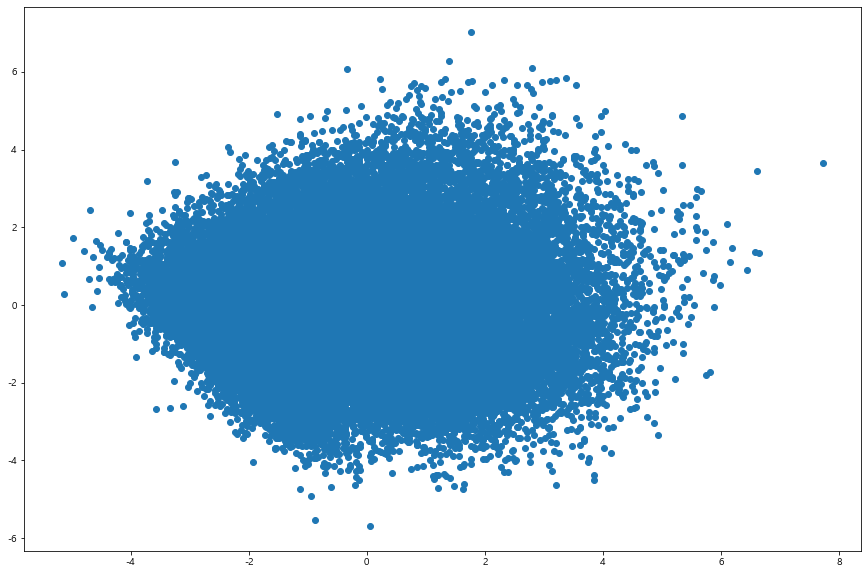

In [21]:
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(x_std)
plt.figure(figsize=(15,10))
plt.scatter(pc[:,0],pc[:,1])

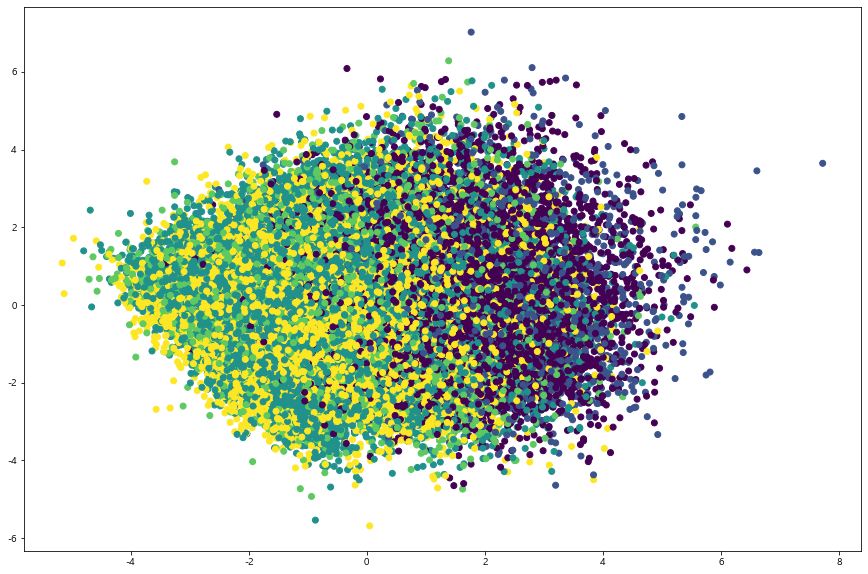

In [22]:
y = result.Cluster
pc_y = np.c_[pc,y]
df = pd.DataFrame(pc_y,columns=['PC1','PC2','cluster'])
plt.figure(figsize=(15,10))
plt.scatter(x=df['PC1'],y=df['PC2'],c=df['cluster'])

In [23]:
def scatter(df,lst) :
    result = df[df.Cluster.isin(lst)]
    x_std = StandardScaler().fit_transform(result)
    x_std
    pca = decomposition.PCA(n_components=2)
    pc = pca.fit_transform(x_std)
    y = result.Cluster
    pc_y = np.c_[pc,y]
    df = pd.DataFrame(pc_y,columns=['PC1','PC2','cluster'])
#     plt.figure(figsize=(15,15))
#     plt.scatter(x=df['PC1'],y=df['PC2'],c=df['cluster'])
#     plt.show()
    g = sns.lmplot('PC1', 'PC2', data=df, fit_reg=False, 
               scatter_kws={"s": 50}, 
               hue="cluster") 
    g.fig.set_size_inches(15,10)

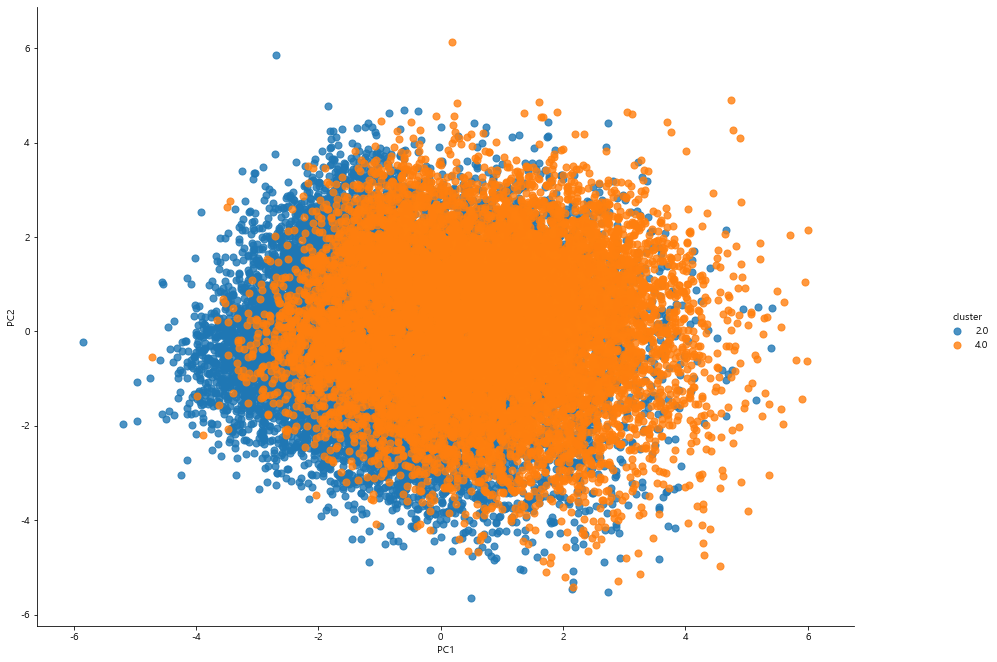

In [25]:
scatter(result,[2,4]) # 여기 list로 클러스터 넣으면 그래프 나옴